<h1 style="font-size: 50px; color: #800000 ;text-align: center; background-color:#ffd700;"> AIRLINES DELAY PREDICTION </h1>

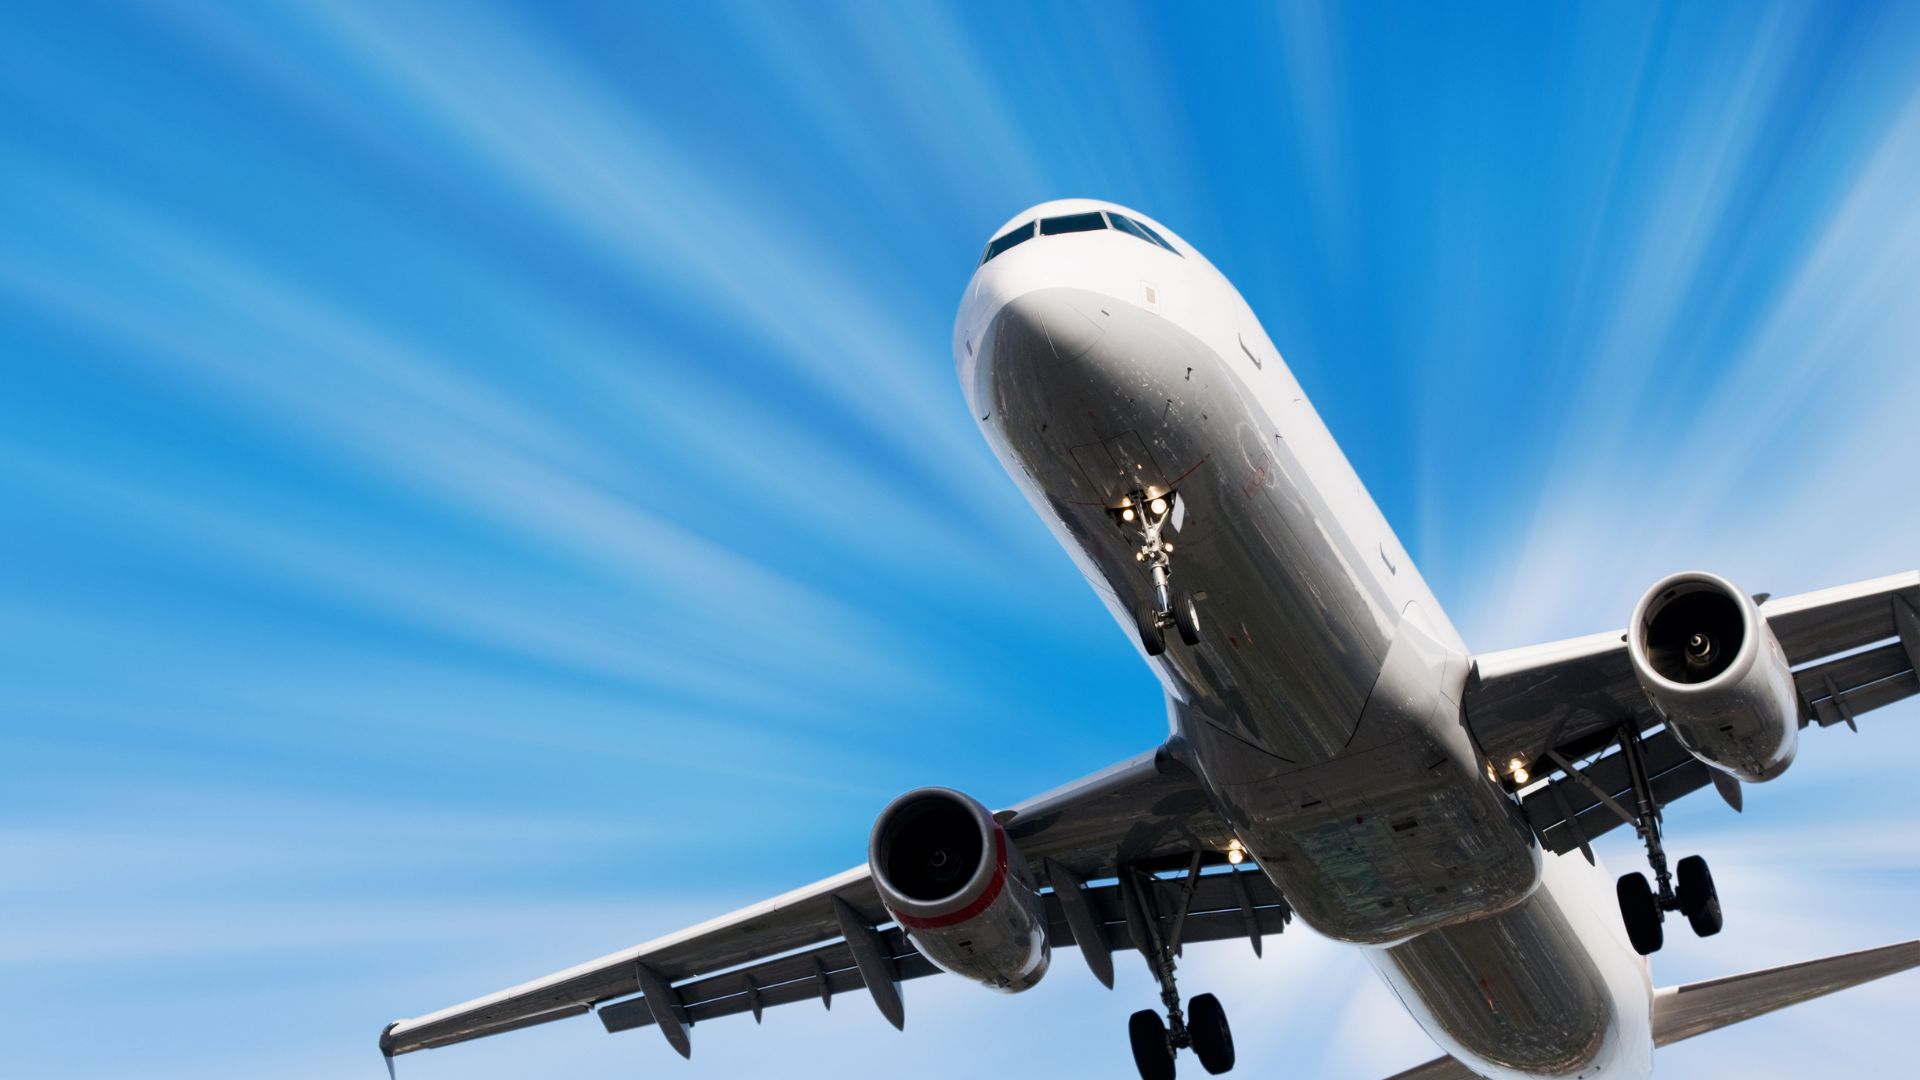

<h1 style="font-size: 40px; color: #800000 ;text-align: center; background-color:#ffd700;"> PROBLEM STATEMENT </h1>

Airline flight delays are a common occurrence in the aviation industry, often caused by a variety of factors causing inconvenience and affecting travel plans. Airlines also suffer from the financial and operational consequences of flight delays. Therefore a flight delay prediction algorithm is needed that hope can improve their decision-making related with the operational cost or saving budget that may be needed due to flight delay like compensation for the passengers.

The objective of this final project was to analyze the various factors that contribute to flight delays and build a machine learning model that can predict the likelihood of a flight being delayed. The model was trained on a dataset of flights from various airlines and the results were evaluated based on the accuracy and reliability of the predictions.


https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay

# Load Dependencies

In [1]:

import pandas as pd
import klib as k
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.ensemble import RandomForestClassifier

# Load Dataset

In [2]:
df = pd.read_csv('AirlinesNew.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


# Data Description

Category Definitions:

ID - Unique row identifier ID.

Airline - Abreviated name of different commericial airlines.

Flight - Tell about the type of aircraft used.

AirportFrom - The airport origin for the flight.

AirportTo - The airport destination for the flight.

DayOfWeek - Day of the week when the flight took place.

Time - Time of flight.

Length - Length of flight.

Delay - Whether or not there was a delay.

# Descriptive Analysis

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,539383.0,269692.000000,155706.604460,1.0,134846.5,269692.0,404537.5,539383.0
Flight,539383.0,2427.928630,2067.429837,1.0,712.0,1809.0,3745.0,7814.0
DayOfWeek,539383.0,3.929668,1.914664,1.0,2.0,4.0,5.0,7.0
Time,539383.0,802.728963,278.045911,10.0,565.0,795.0,1035.0,1439.0
Length,539383.0,132.202007,70.117016,0.0,81.0,115.0,162.0,655.0
Delay,539383.0,0.445442,0.497015,0.0,0.0,0.0,1.0,1.0


# Checking  null values

In [5]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

# Exploratory Data Analysis (EDA)

In [6]:
df['Delay'].value_counts()
     

0    299119
1    240264
Name: Delay, dtype: int64

### Plotting Categorical Data

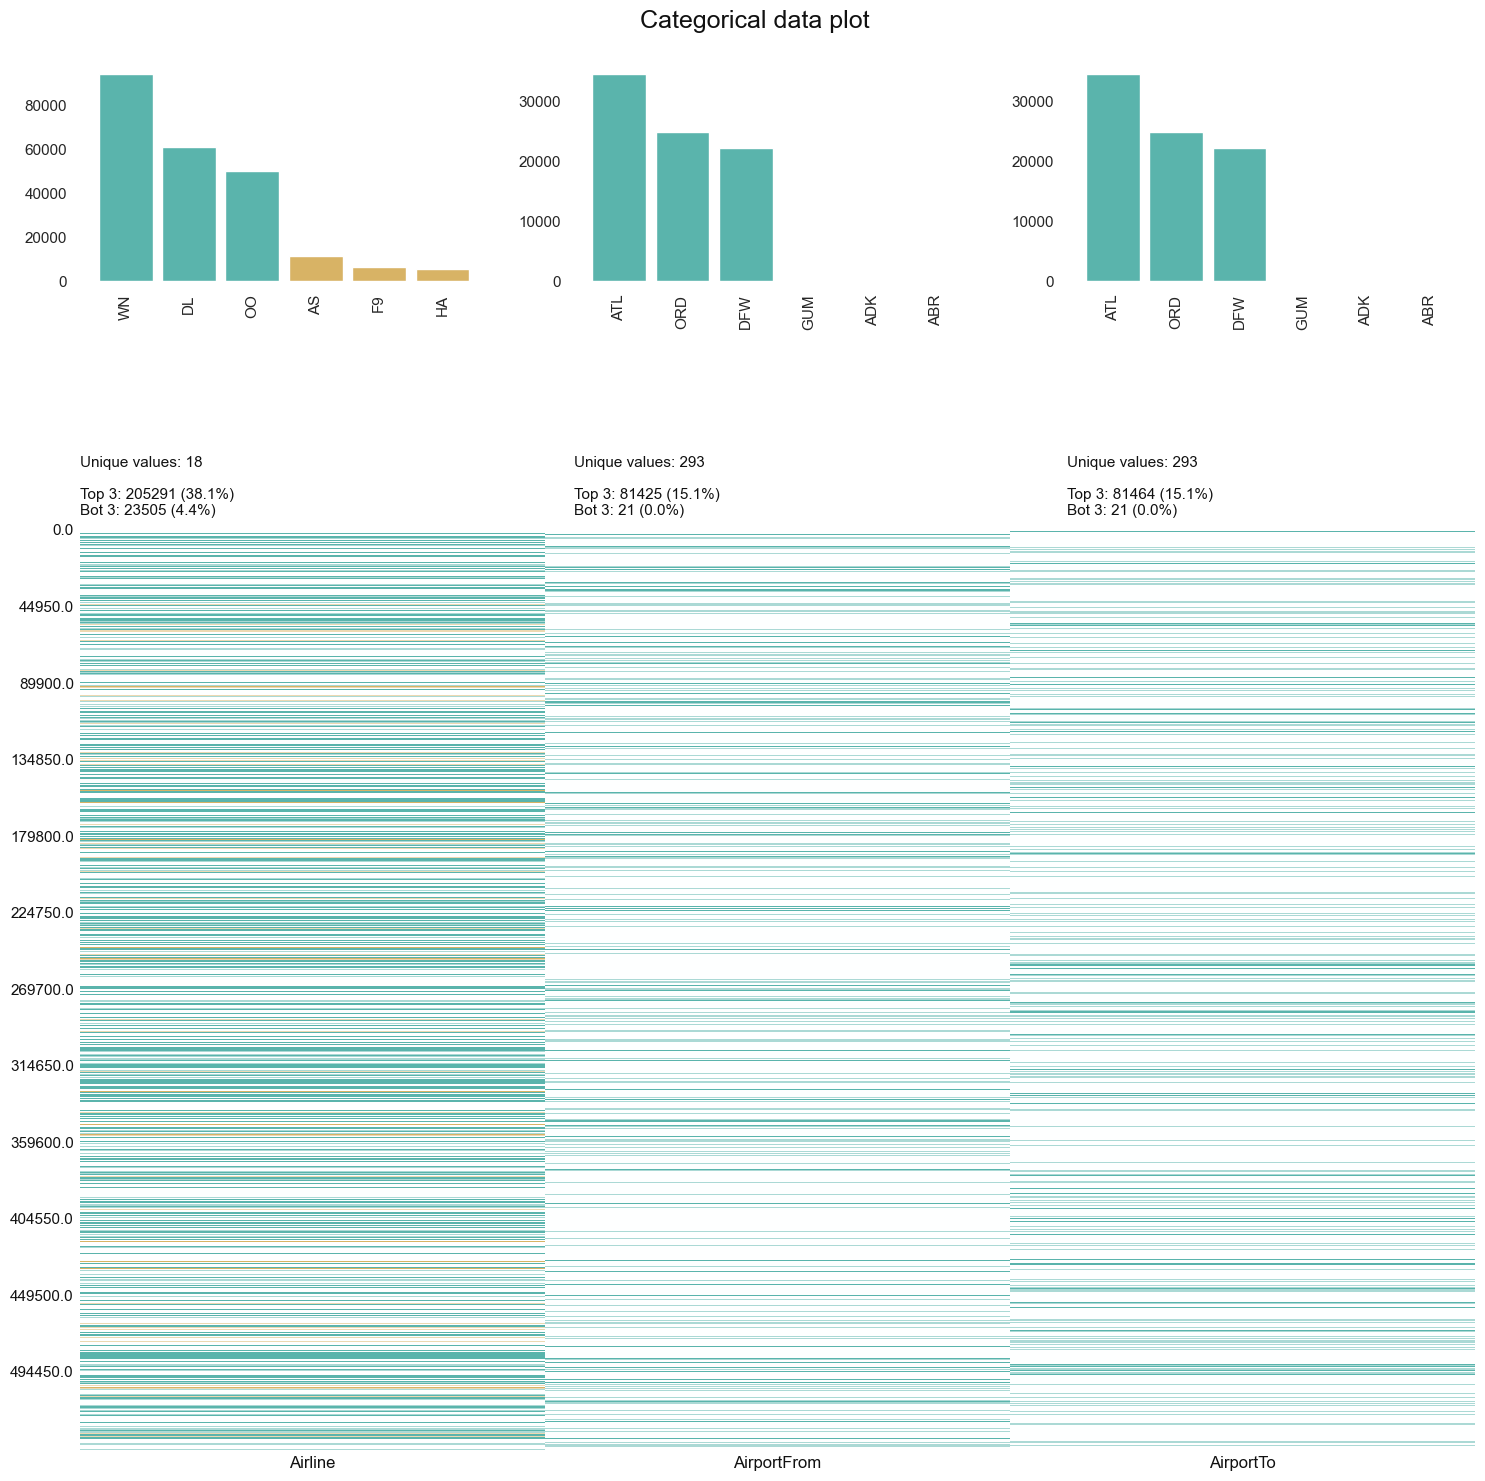

In [7]:
k.cat_plot(df);

### Distribution Plot

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


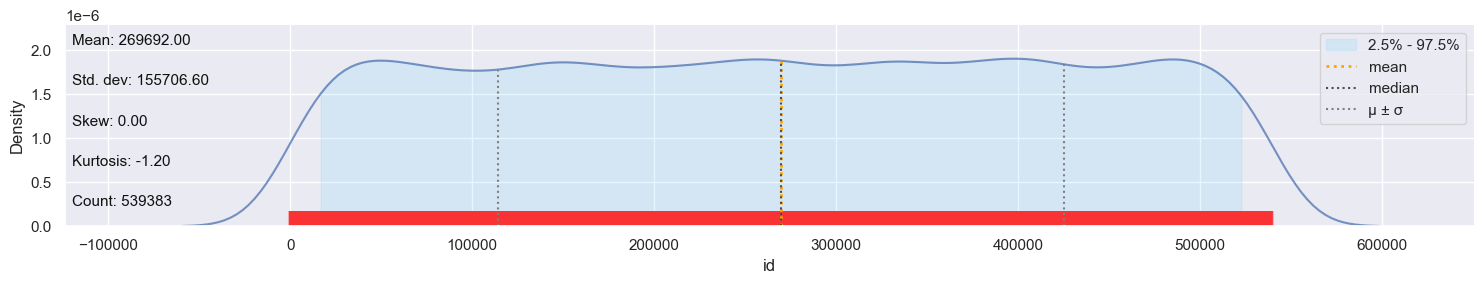

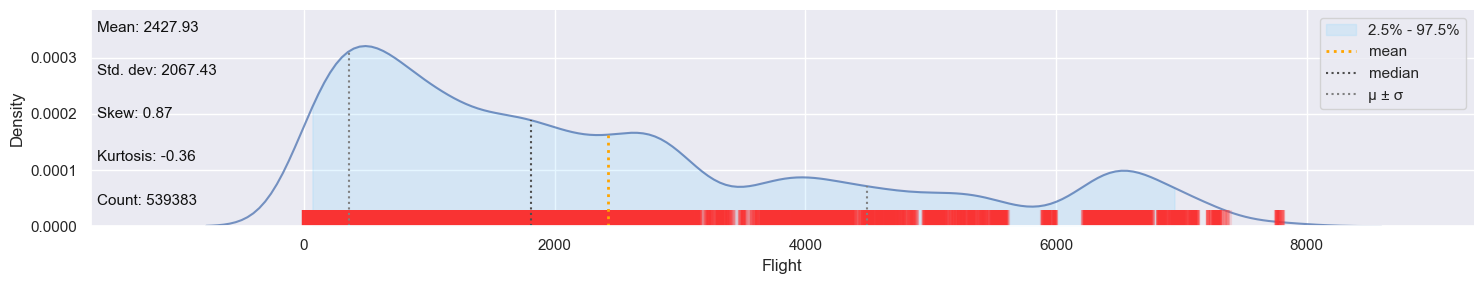

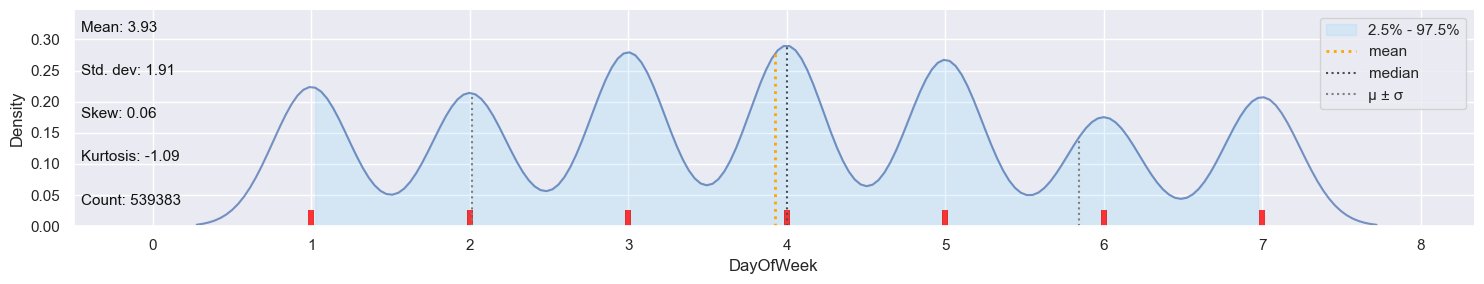

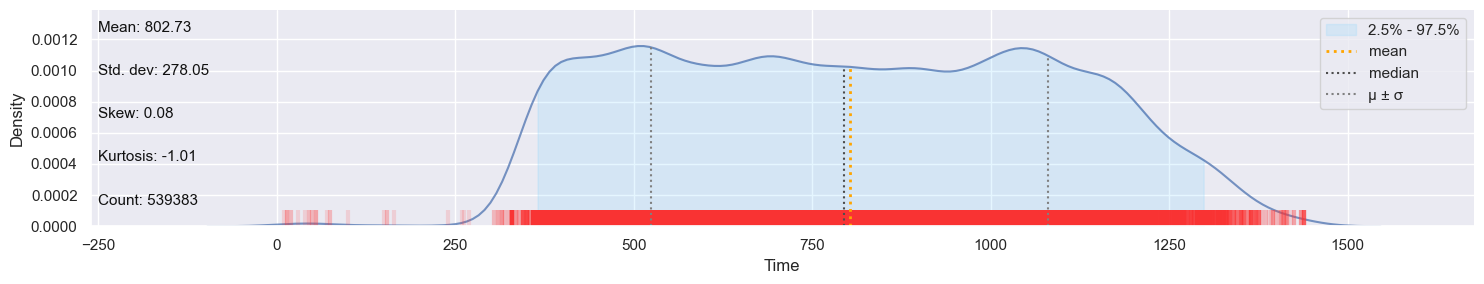

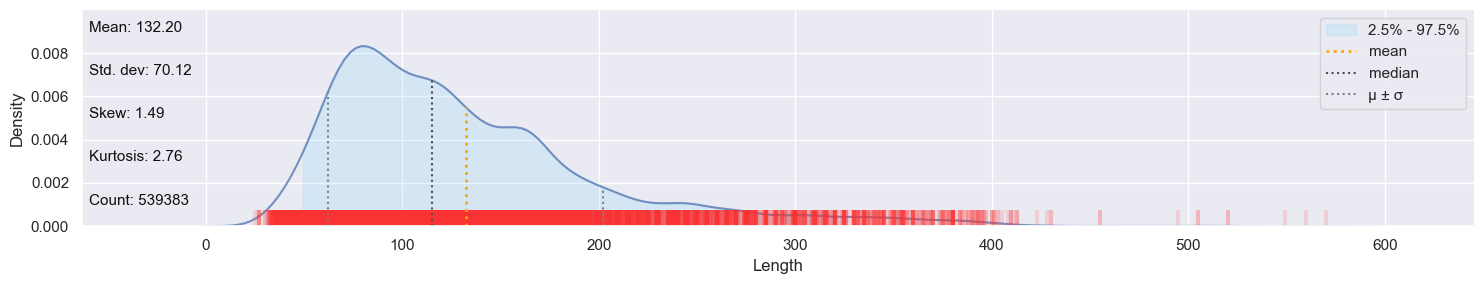

In [8]:
k.dist_plot(df);

### Hist Plot

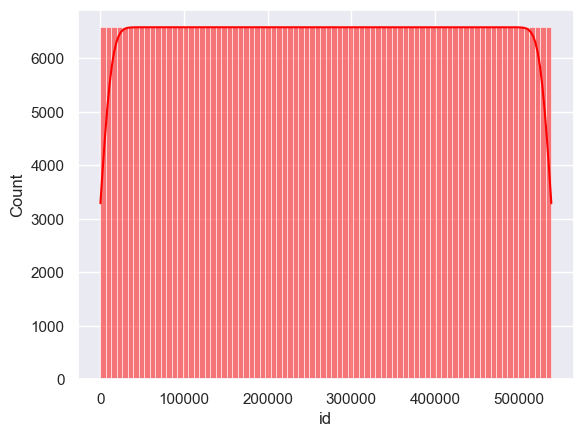

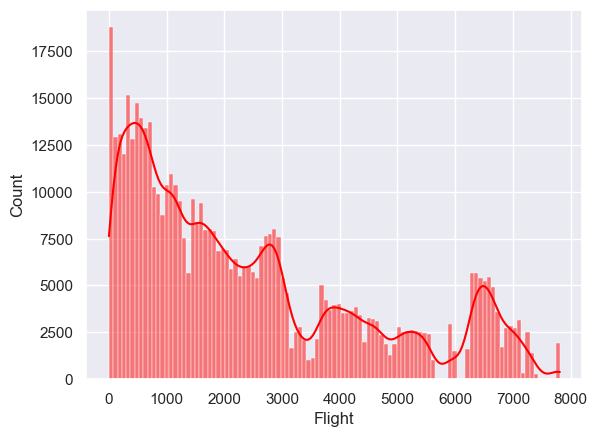

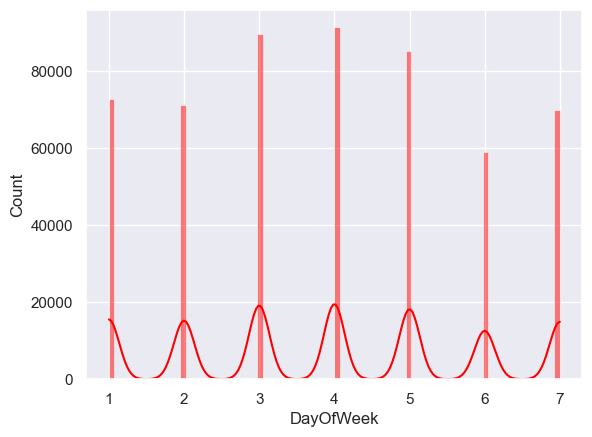

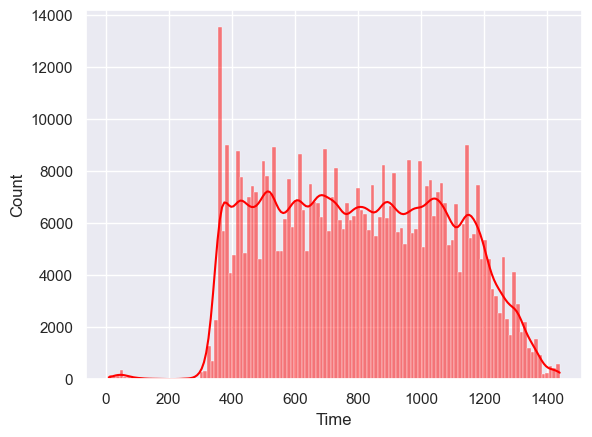

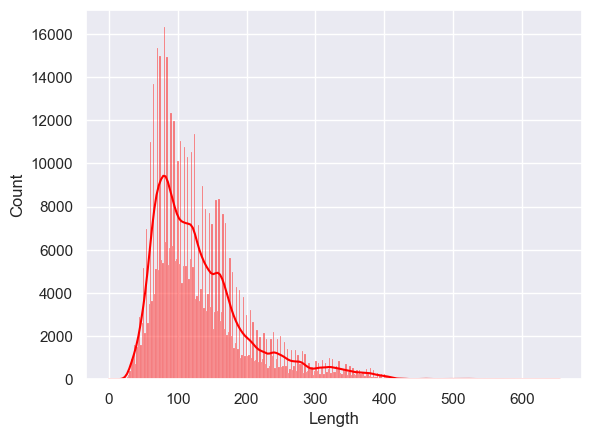

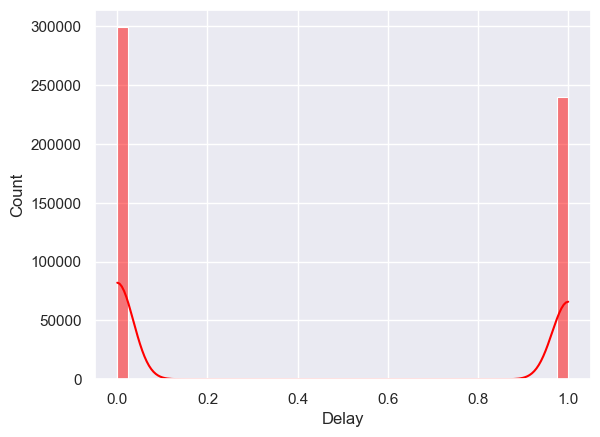

In [9]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.histplot(df, x=df[column], kde=True, color="red")
        plt.show()

### Countplot

<AxesSubplot: xlabel='DayOfWeek', ylabel='count'>

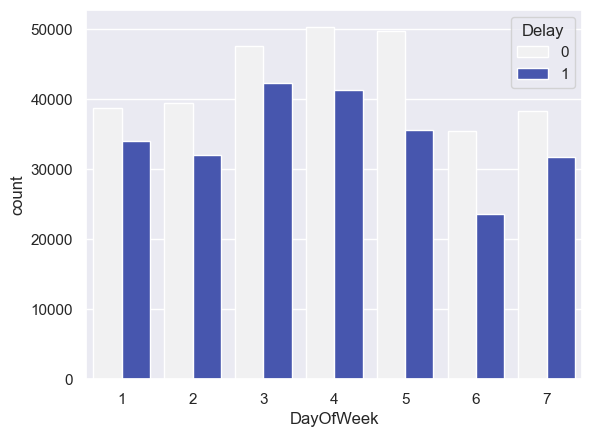

In [10]:

# What days have the most delays?
sns.countplot(x='DayOfWeek',hue='Delay',data=df,color="#364ABF")

<AxesSubplot: xlabel='Airline', ylabel='Time'>

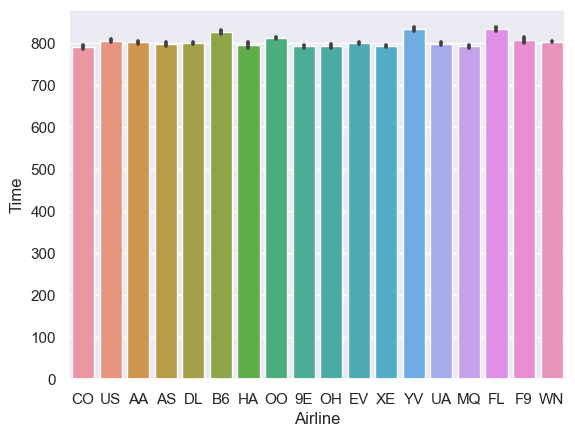

In [11]:
sns.barplot(data=df, x="Airline", y="Time")
#Almost all of the airplane have the same departure time

### Detecting outliers in numerical columns using boxplot

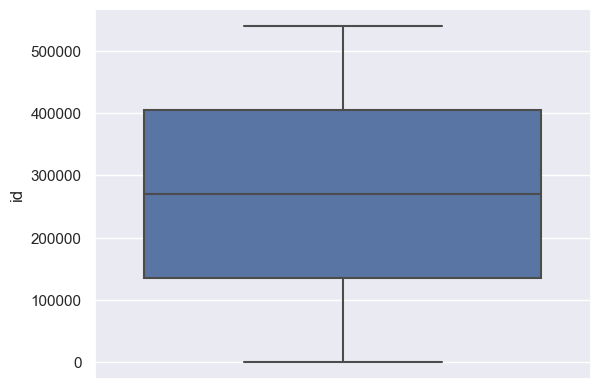

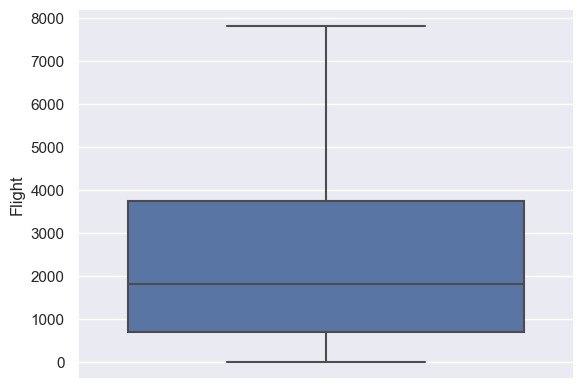

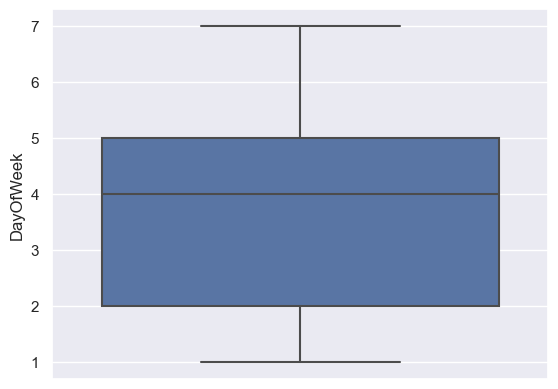

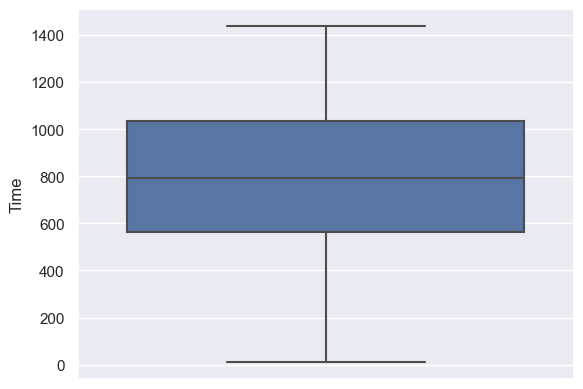

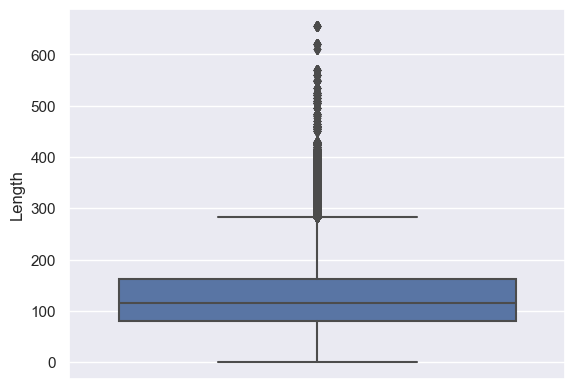

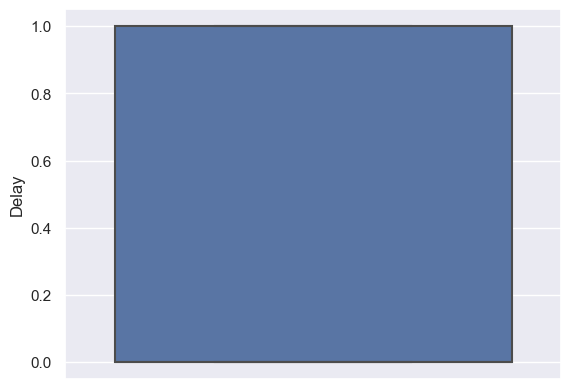

In [12]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column])
        plt.show()

In [13]:
df.isnull().mean()*100

id             0.0
Airline        0.0
Flight         0.0
AirportFrom    0.0
AirportTo      0.0
DayOfWeek      0.0
Time           0.0
Length         0.0
Delay          0.0
dtype: float64

# Label Encoding


In [14]:
le=LabelEncoder()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [16]:
to_transform = ['Airline', 'AirportFrom','AirportTo']


In [17]:
for i in to_transform:
    df[i] = le.fit_transform(df[i])
    

# Correlation

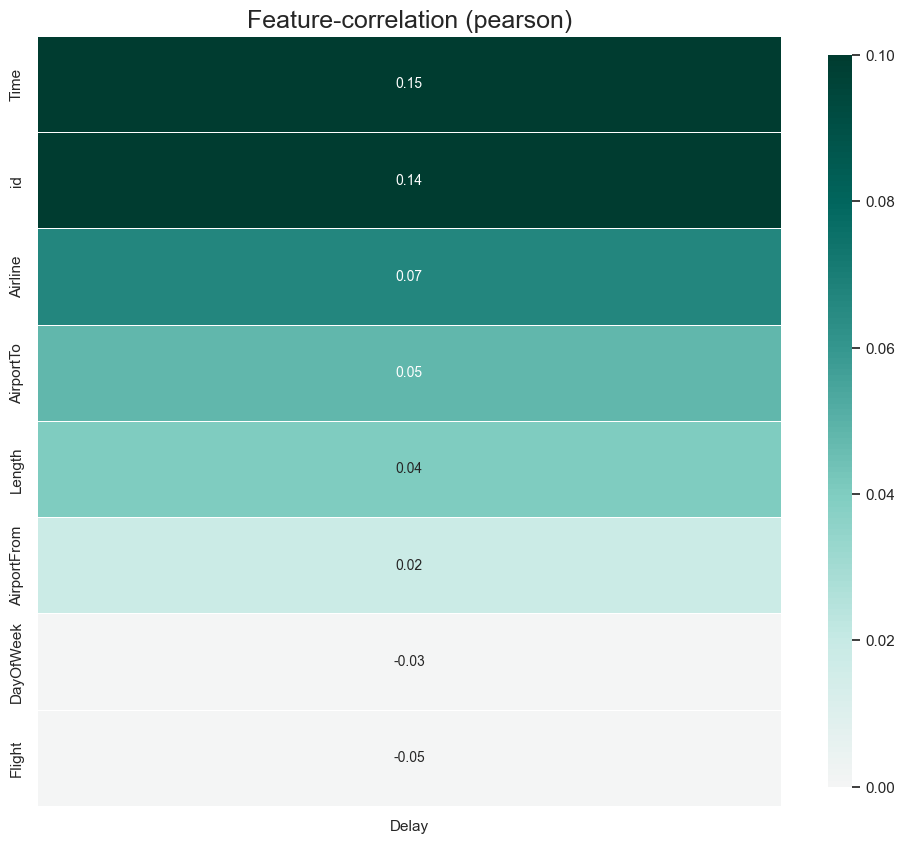

In [18]:
k.corr_plot(data=df,target='Delay');

# Feature Engineering

In [19]:
x = df.drop(columns=['Delay','Length'])
y = df['Delay']

In [20]:
sc=StandardScaler()
x=sc.fit_transform(x)

# Model Selection

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Decision Tree Classifier

In [22]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    #"SVC" : SVC(gamma='auto', probability=True)
}

In [23]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("mean score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
mean score:  0.552006825254983
****************************************************************************************************
cross validation model : DecisionTreeClassifier
mean score:  0.16468768819483998
****************************************************************************************************
cross validation model : RandomForestClassifier
mean score:  0.16472291317120216
****************************************************************************************************
cross validation model : KNeighborsClassifier
mean score:  0.1990992427218184
****************************************************************************************************


### We can see that "LogisticRegression" is having the best overall perfomance so far. We may proceed with it.

In [24]:
model = LogisticRegression()
model.fit(x_train,y_train) 

LogisticRegression()

In [27]:
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    score_train =accuracy_score (y_train, model.predict(x_train))
    score_tst = accuracy_score(y_test, model.predict(x_test))
    con_train = confusion_matrix(y_train, model.predict(x_train))
    con_test = confusion_matrix(y_test, model.predict(x_test))
    print("Model accuracy on train is:: ",score_train)
    print("Model accuracy on test is:: ", score_tst)
    print("confusion_matrix train is:: ", con_train)
    print("confusion_matrix test is:: ", con_test)
    print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
    print("*"*60)

model trained with KNeighborsClassifier
Model accuracy on train is::  0.5998317520497977
Model accuracy on test is::  0.6018706489798566
confusion_matrix train is::  [[180106  58999]
 [113676  78725]]
confusion_matrix test is::  [[45307 14707]
 [28242 19621]]
Wrong Predictions made: 42949 / 107877
************************************************************


In [28]:
y_pred=model.predict(x)

In [29]:
from sklearn.metrics import confusion_matrix,f1_score

In [30]:
confusion_matrix(y_pred,y)

array([[225413, 141918],
       [ 73706,  98346]], dtype=int64)

In [31]:
f1_score(y_pred,y)

0.4770418804994228

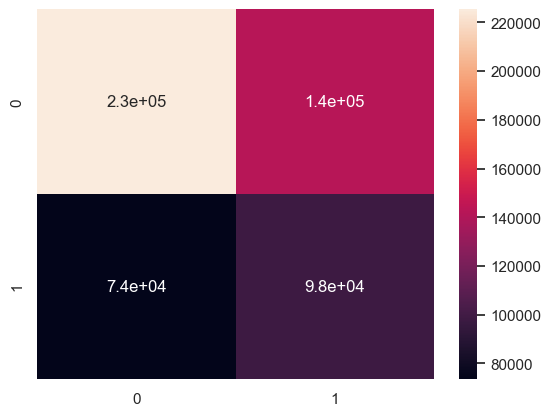

In [32]:
sns.heatmap(confusion_matrix(y_pred,y), annot=True);

In [33]:
f1_score(y,y_pred)


0.4770418804994228

Model used is::  LogisticRegression()


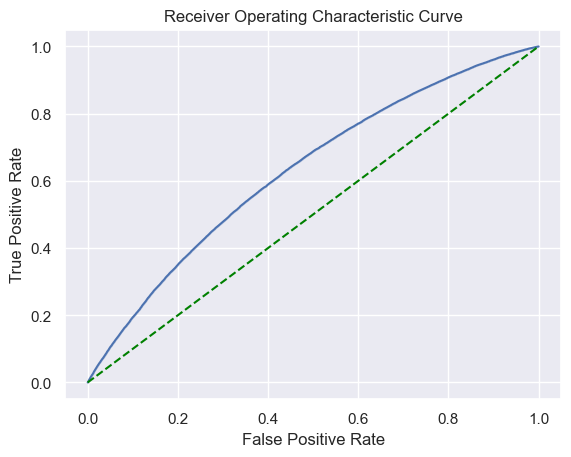

In [34]:
    model.fit(x_train, y_train)
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print("Model used is:: ",model)
    sns.lineplot(x= fpr, y=tpr)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.show()

# In this analysis,Logistic Regression Confusion matrix, we did extensive analysis of input data and were able to achieve Test Accuracy of 47.7 %